## Gaussian Grid

To get the parameters for the gaussian grid, it has to be visualised. The main reason for this is that $\sigma$, $\beta$, and n do not have any physical units. 

In addition to the point of interest (latitude, longitude), the following parameters have to be picked:
- $\phi_{ini}$: initial distance between grid points, in degrees
- $\phi_{max}$: maximum distance between grid points, in degrees
- $\sigma$: size of the denser part of the grid.
- $\beta$: slope of the increase in grid point distance.
- n: number of points in the variable. 

When a larger n is used, $\sigma$ also has to be increased. 

In [17]:
from noisi.scripts.source_grid_gauss import gauss_grid

In [18]:
# Pick values for the input variables

sigma = 10
beta = 3
phi_ini = 0.5
phi_max = 3
lat_0 = 46.234
lon_0 = 7.3454
n = 200
dense_antipole = False
only_ocean = False

Number of Gridpoints: 17038
Minimum dx in m: 55624.012 m which is 0.5 °
Maximum dx in m: 333744.072 m which is 3.0 °


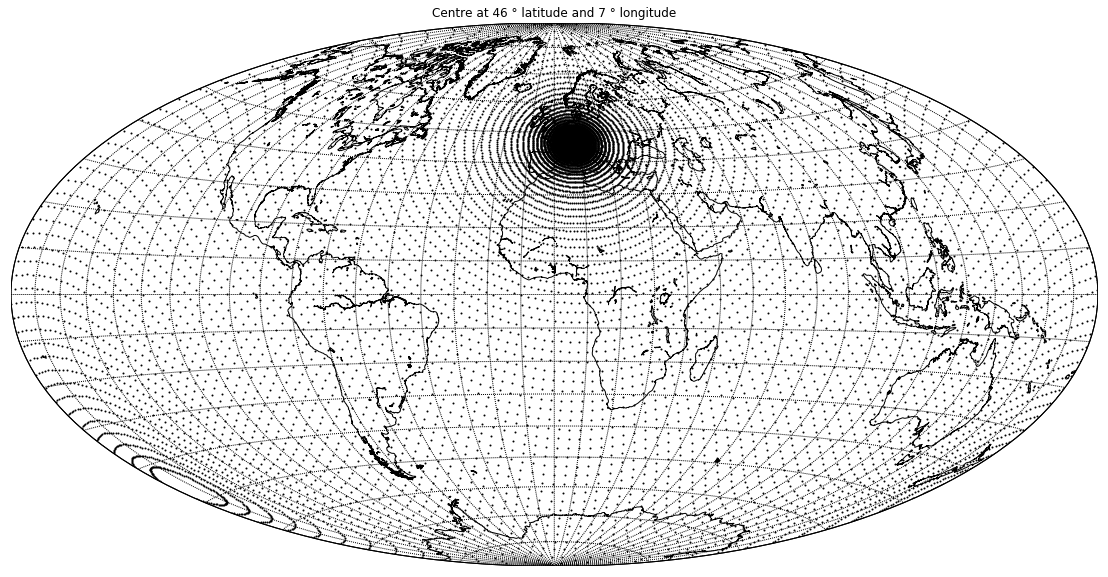

In [19]:
grid = gauss_grid(sigma,beta,phi_ini,phi_max,lat_0,lon_0,n,plot=True,dense_antipole = dense_antipole,only_ocean=only_ocean)

In [ ]:
# Write to config.json file
import io
import json

with io.open('./config.json','r+') as fh:
        conf = json.loads(fh.read())
        
conf['gauss_grid'] = True      
conf['gauss_sigma'] = sigma
conf['gauss_beta'] = beta
conf['gauss_phi_ini'] = phi_ini
conf['gauss_phi_max'] = phi_max
conf['gauss_lat_0'] = lat_0
conf['gauss_lon_0'] = lon_0
conf['gauss_n'] = n
conf['gauss_dense_antipole'] = dense_antipole
conf['gauss_only_ocean'] = only_ocean

# Set below to true if voronoi cell surface area is to be calculated
conf['voronoi_surface_area'] = True

with io.open('./config.json','w') as fh:
    cf = json.dumps(conf,sort_keys=False, indent=4, separators=(",", ": "))
    fh.write(cf)